<a href="https://colab.research.google.com/github/ajaym416/Nepse-Forecasting/blob/main/Nepse_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
shutil.unpack_archive("/content/drive/MyDrive/floorsheeet.zip","/content")

In [ ]:
import pandas as pd
df=pd.read_csv("/content/floorsheeet.csv")

In [ ]:
df.head()

,SN,ContractNo,Symbol,BuyerBroker,SellerBroker,ShareQty,Rate,Amount,CompanyName,Date,ID
0,1,2020121401015813,RHPL,16,58,40,296,11840,NaN,12/14/2020 12:00:00 AM,1303274
1,2,2020121401015812,RHPL,16,34,10,296,2960,NaN,12/14/2020 12:00:00 AM,1303275
2,3,2020121401015775,RHPL,3,22,40,295,11800,NaN,12/14/2020 12:00:00 AM,1303276
3,4,2020121401015765,RHPL,3,28,40,295,11800,NaN,12/14/2020 12:00:00 AM,1303277
4,5,2020121401015980,RRHP,43,50,10,262,2620,NaN,12/14/2020 12:00:00 AM,1303278


In [ ]:

df.drop(['SN','ContractNo','CompanyName','ID'] ,axis=1,inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date')

,Symbol,BuyerBroker,SellerBroker,ShareQty,Rate,Amount
Date,,,,,,
2020-12-14,RHPL,16,58,40,296,11840
2020-12-14,RHPL,16,34,10,296,2960
2020-12-14,RHPL,3,22,40,295,11800
2020-12-14,RHPL,3,28,40,295,11800
2020-12-14,RRHP,43,50,10,262,2620
...,...,...,...,...,...,...
2021-03-17,STC,3,16,10,10800,108000
2021-03-17,NRN,45,29,10,410,4100
2021-03-17,SFCL,44,34,10,203,2030


In [ ]:
df['BuyerBroker'].unique()

array([16,  3, 43, 34, 39, 42, 58, 55, 56, 25, 44, 50, 22, 10, 49, 41, 52,
       19, 35, 40, 47,  6, 18, 54, 45, 48, 29, 59, 26, 46, 32, 38, 51, 14,
       13, 33, 36, 37, 17,  4, 53, 21, 28,  5,  8,  1, 11, 57, 20,  7])

In [ ]:
buying_and_selling_broker_list=[]
for index in df['BuyerBroker'].unique():
  buying_and_selling_broker_list.append(f"BB_{index}")
  buying_and_selling_broker_list.append(f"SB_{index}")
buying_and_selling_broker_list

['BB_16',
 'SB_16',
 'BB_3',
 'SB_3',
 'BB_43',
 'SB_43',
 'BB_34',
 'SB_34',
 'BB_39',
 'SB_39',
 'BB_42',
 'SB_42',
 'BB_58',
 'SB_58',
 'BB_55',
 'SB_55',
 'BB_56',
 'SB_56',
 'BB_25',
 'SB_25',
 'BB_44',
 'SB_44',
 'BB_50',
 'SB_50',
 'BB_22',
 'SB_22',
 'BB_10',
 'SB_10',
 'BB_49',
 'SB_49',
 'BB_41',
 'SB_41',
 'BB_52',
 'SB_52',
 'BB_19',
 'SB_19',
 'BB_35',
 'SB_35',
 'BB_40',
 'SB_40',
 'BB_47',
 'SB_47',
 'BB_6',
 'SB_6',
 'BB_18',
 'SB_18',
 'BB_54',
 'SB_54',
 'BB_45',
 'SB_45',
 'BB_48',
 'SB_48',
 'BB_29',
 'SB_29',
 'BB_59',
 'SB_59',
 'BB_26',
 'SB_26',
 'BB_46',
 'SB_46',
 'BB_32',
 'SB_32',
 'BB_38',
 'SB_38',
 'BB_51',
 'SB_51',
 'BB_14',
 'SB_14',
 'BB_13',
 'SB_13',
 'BB_33',
 'SB_33',
 'BB_36',
 'SB_36',
 'BB_37',
 'SB_37',
 'BB_17',
 'SB_17',
 'BB_4',
 'SB_4',
 'BB_53',
 'SB_53',
 'BB_21',
 'SB_21',
 'BB_28',
 'SB_28',
 'BB_5',
 'SB_5',
 'BB_8',
 'SB_8',
 'BB_1',
 'SB_1',
 'BB_11',
 'SB_11',
 'BB_57',
 'SB_57',
 'BB_20',
 'SB_20',
 'BB_7',
 'SB_7']

In [ ]:
final_df = pd.DataFrame(columns=['Date','Symbol','Open','Close','High','Low','High_quantity_transaction',*buying_and_selling_broker_list])

In [ ]:
final_df

,Date,Symbol,Open,Close,High,Low,High_quantity_transaction,BB_16,SB_16,BB_3,SB_3,BB_43,SB_43,BB_34,SB_34,BB_39,SB_39,BB_42,SB_42,BB_58,SB_58,BB_55,SB_55,BB_56,SB_56,BB_25,SB_25,BB_44,SB_44,BB_50,SB_50,BB_22,SB_22,BB_10,SB_10,BB_49,SB_49,BB_41,SB_41,BB_52,...,BB_32,SB_32,BB_38,SB_38,BB_51,SB_51,BB_14,SB_14,BB_13,SB_13,BB_33,SB_33,BB_36,SB_36,BB_37,SB_37,BB_17,SB_17,BB_4,SB_4,BB_53,SB_53,BB_21,SB_21,BB_28,SB_28,BB_5,SB_5,BB_8,SB_8,BB_1,SB_1,BB_11,SB_11,BB_57,SB_57,BB_20,SB_20,BB_7,SB_7


In [ ]:
Company_symbol = 'NICA'
company_df=df[df['Symbol']==Company_symbol]
for index,date in enumerate(company_df['Date'].unique()):
  Open=company_df[company_df['Date']==date].iloc[0,4]
  Close=company_df[company_df['Date']==date].iloc[-1,4]
  High=max(company_df[company_df['Date']==date].iloc[:,4])
  Low=min(company_df[company_df['Date']==date].iloc[:,4])
  High_quantity_value=company_df['ShareQty'].describe()['75%']*4
  High_quantity_transaction=np.sum(company_df[company_df['Date']==date]['ShareQty']>High_quantity_value)
  Buyer_broker_holding=company_df[company_df['Date']==date].groupby(['BuyerBroker'])['ShareQty'].sum()
  Seller_broker_holding=company_df[company_df['Date']==date].groupby(['SellerBroker'])['ShareQty'].sum()
  final_df.loc[index,['Date','Symbol','Open','Close','High','Low','High_quantity_transaction']]=[date,Company_symbol,Open,Close,High,Low,High_quantity_transaction]
  for key,values in Buyer_broker_holding.items():
    final_df.loc[index,f"BB_{key}"]=values
  for key,values in Seller_broker_holding.items():
     final_df.loc[index,f"SB_{key}"]=values



In [ ]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.set_index('Date' , inplace=True)
final_df.sort_index(inplace=True)

In [ ]:
final_df.describe()

,Symbol,Open,Close,High,Low,High_quantity_transaction,BB_16,SB_16,BB_3,SB_3,BB_43,SB_43,BB_34,SB_34,BB_39,SB_39,BB_42,SB_42,BB_58,SB_58,BB_55,SB_55,BB_56,SB_56,BB_25,SB_25,BB_44,SB_44,BB_50,SB_50,BB_22,SB_22,BB_10,SB_10,BB_49,SB_49,BB_41,SB_41,BB_52,SB_52,...,BB_32,SB_32,BB_38,SB_38,BB_51,SB_51,BB_14,SB_14,BB_13,SB_13,BB_33,SB_33,BB_36,SB_36,BB_37,SB_37,BB_17,SB_17,BB_4,SB_4,BB_53,SB_53,BB_21,SB_21,BB_28,SB_28,BB_5,SB_5,BB_8,SB_8,BB_1,SB_1,BB_11,SB_11,BB_57,SB_57,BB_20,SB_20,BB_7,SB_7
count,180,180,180,180,180,180,168,162,131,129,165,147,173,175,161,161,175,172,179,176,168,162,166,159,166,169,169,165,166,173,170,170,152,157,175,175,172,169,163,164,...,171,167,171,167,165,164,173,167,158,153,176,172,174,173,145,142,171,172,150,153,165,159,161,157,171,175,144,155,149,139,167,159,148,161,175,170,114,117,149,148
unique,1,116,120,122,120,46,150,149,102,101,143,138,166,170,137,149,168,165,172,175,139,150,147,149,154,164,166,161,155,163,153,162,114,140,169,173,162,167,148,150,...,160,153,164,158,138,148,159,158,126,142,169,164,164,165,96,124,163,168,124,142,127,141,137,146,154,168,104,144,108,119,149,145,106,148,161,166,83,100,105,134
top,NICA,580,580,582,570,2,100,500,200,100,100,300,1400,20,100,250,1700,100,100,1100,100,1000,200,100,200,300,50,100,500,200,100,1280,200,600,100,2850,2100,960,100,100,...,600,100,200,100,50,200,600,880,300,50,100,700,1020,500,200,200,100,150,50,100,100,200,50,300,500,500,100,200,50,200,300,100,200,500,1000,319,500,100,100,100
freq,180,5,7,8,6,12,4,5,9,8,10,3,2,2,7,3,2,4,3,2,7,4,7,5,4,3,2,3,4,4,4,2,7,5,4,2,2,2,4,6,...,4,8,2,3,5,4,6,2,6,3,4,3,3,5,11,5,3,2,5,3,9,7,5,5,7,3,10,5,8,7,3,4,6,3,4,2,5,5,10,7


In [ ]:
final_df.isna().sum()

Symbol     0
Open       0
Close      0
High       0
Low        0
          ..
SB_57     10
BB_20     66
SB_20     63
BB_7      31
SB_7      32
Length: 106, dtype: int64

In [ ]:
final_df.fillna(0 ,inplace=True)

In [ ]:
# RSI 14 DAYS
n = 14
def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

final_df['change'] = final_df['Close'].diff()
final_df['gain'] = final_df.change.mask(final_df.change < 0, 0.0)
final_df['loss'] = -final_df.change.mask(final_df.change > 0, -0.0)
final_df['avg_gain'] = rma(final_df.gain[n+1:].to_numpy(), n, np.nansum(final_df.gain.to_numpy()[:n+1])/n)
final_df['avg_loss'] = rma(final_df.loss[n+1:].to_numpy(), n, np.nansum(final_df.loss.to_numpy()[:n+1])/n)
final_df['rs'] = final_df.avg_gain / final_df.avg_loss
final_df['rsi_14'] = 100 - (100 / (1 + final_df.rs))

In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,BB_16,SB_16,BB_3,SB_3,BB_43,SB_43,BB_34,SB_34,BB_39,SB_39,BB_42,SB_42,BB_58,SB_58,BB_55,SB_55,BB_56,SB_56,BB_25,SB_25,BB_44,SB_44,BB_50,SB_50,BB_22,SB_22,BB_10,SB_10,BB_49,SB_49,BB_41,SB_41,BB_52,SB_52,...,SB_14,BB_13,SB_13,BB_33,SB_33,BB_36,SB_36,BB_37,SB_37,BB_17,SB_17,BB_4,SB_4,BB_53,SB_53,BB_21,SB_21,BB_28,SB_28,BB_5,SB_5,BB_8,SB_8,BB_1,SB_1,BB_11,SB_11,BB_57,SB_57,BB_20,SB_20,BB_7,SB_7,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NICA,575,572,589,560,17,4650,4461,0,1555,1050,2591,45185,2508,2250,572,140,2034,8747,3116,2700,2342,6308,1058,1551,2732,2510,6505,10170,6522,2550,1774,400,4000,8129,3248,1494,1824,400,940,...,6574,378,2406,8213,11449,1020,12268,2100,5796,100,6170,4800,4600,3510,647,400,3812,15550,9709,500,1254,200,600,2050,2278,270,507,2152,3336,0,0,580,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,NICA,526,549,564,526,19,1354,0,550,0,100,870,10732,3870,710,566,9295,2299,10678,20,200,1000,1150,13199,200,3605,15123,2689,8197,2622,1350,810,0,4150,4867,2350,1025,11729,210,16925,...,3685,0,1772,6940,4240,2500,6970,400,0,1000,2564,11000,1160,11086,5144,3500,1421,350,2026,901,121,1100,0,200,3070,1712,2015,420,1640,0,0,1500,1235,-23.0,0.0,23.0,NaN,NaN,NaN,NaN
2020-03-11,NICA,567,549,569,520,29,2900,5450,0,1000,550,2583,4490,1660,7811,3306,6470,4039,23698,17959,2010,3667,2710,3422,6550,15787,4259,11540,6108,4142,2040,3750,850,3740,6942,2565,3510,3903,3498,7615,...,5251,1325,712,6580,5554,9050,2612,1400,1500,10485,50365,46250,5031,6050,3460,3688,1303,6612,34884,230,150,400,2200,2370,1410,450,648,4850,3240,2560,0,100,353,0.0,0.0,-0.0,NaN,NaN,NaN,NaN
2020-03-12,NICA,545,564,569,545,18,2380,1411,0,400,4600,588,4975,1687,3815,2298,4253,3564,12678,22444,3433,821,3637,3621,2710,9936,10666,10252,5550,15414,1330,1000,4748,1331,9487,8477,7146,743,3920,8799,...,7035,460,2119,2510,5455,8101,1700,1600,1346,3410,2087,19550,8120,1915,10478,1270,500,1400,17466,1402,4162,950,0,880,547,700,250,4400,5112,1300,764,700,1075,15.0,15.0,0.0,NaN,NaN,NaN,NaN
2020-03-15,NICA,521,545,547,518,16,5060,1500,200,250,125,1150,5875,1310,4317,6251,1955,880,2010,7031,1886,901,4368,4666,11018,1110,18412,14993,2100,3765,665,6186,2200,1236,6310,12230,4657,8784,5000,213,...,2802,740,120,4700,1579,7880,4808,1500,806,3278,14487,16540,35223,5200,2000,1364,386,2700,3300,1850,7417,700,6181,366,2529,450,1050,1870,2450,800,34,470,1962,-19.0,0.0,19.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,NICA,892,887,927,861,14,3630,600,2380,3050,1270,5632,2719,12166,3053,2367,3450,1597,3756,13677,1110,652,10696,4604,600,9337,11136,20876,13575,2186,750,639,2355,0,28732,1422,2210,1644,1683,2372,...,2575,4345,800,21863,7394,2510,500,886,3570,11932,2888,3080,11256,1110,4722,2279,1847,1970,18725,1000,78,2070,0,955,685,280,911,2940,5101,3270,5750,30,785,-13.0,0.0,13.0,7.956010,9.032390,0.880831,46.832016
2021-03-02,NICA,880,890,909,862,14,3383,1749,3970,1431,8972,0,3369,21202,2528,2351,8089,1824,4385,46906,2169,1834,1299,3803,3257,1616,4400,8473,2092,7157,2435,600,1958,219,19812,6547,5234,1569,4714,3581,...,3008,1850,5017,13965,14942,1060,13005,200,90,4926,3208,4616,3347,5901,2276,1882,1570,3561,6031,1150,182,950,0,5891,2065,930,883,7600,6819,7764,216,1350,930,3.0,3.0,0.0,7.602009,8.387219,0.906380,47.544567
2021-03-03,NICA,855,862,876,853,25,3365,2579,6377,310,475,6318,15183,7300,3026,4484,2000,7254,2946,12602,1688,1250,5859,1399,2883,10758,17491,8413,30492,4272,1830,3125,11643,402,17537,6836,2720,11679,11614,2447,...,7118,725,875,16190,5751,1240,1560,238,1590,4903,7256,2089,2682,1550,2217,1720,1209,4972,5115,1060,798,188,2000,947,8

In [ ]:
# Calculating _moving_average
final_df['MA_7'] = final_df['Close'].rolling(window=7).mean()
final_df['MA_14'] = final_df['Close'].rolling(window=14).mean()


In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,BB_16,SB_16,BB_3,SB_3,BB_43,SB_43,BB_34,SB_34,BB_39,SB_39,BB_42,SB_42,BB_58,SB_58,BB_55,SB_55,BB_56,SB_56,BB_25,SB_25,BB_44,SB_44,BB_50,SB_50,BB_22,SB_22,BB_10,SB_10,BB_49,SB_49,BB_41,SB_41,BB_52,SB_52,...,SB_13,BB_33,SB_33,BB_36,SB_36,BB_37,SB_37,BB_17,SB_17,BB_4,SB_4,BB_53,SB_53,BB_21,SB_21,BB_28,SB_28,BB_5,SB_5,BB_8,SB_8,BB_1,SB_1,BB_11,SB_11,BB_57,SB_57,BB_20,SB_20,BB_7,SB_7,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,MA_7,MA_14
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NICA,575,572,589,560,17,4650,4461,0,1555,1050,2591,45185,2508,2250,572,140,2034,8747,3116,2700,2342,6308,1058,1551,2732,2510,6505,10170,6522,2550,1774,400,4000,8129,3248,1494,1824,400,940,...,2406,8213,11449,1020,12268,2100,5796,100,6170,4800,4600,3510,647,400,3812,15550,9709,500,1254,200,600,2050,2278,270,507,2152,3336,0,0,580,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,NICA,526,549,564,526,19,1354,0,550,0,100,870,10732,3870,710,566,9295,2299,10678,20,200,1000,1150,13199,200,3605,15123,2689,8197,2622,1350,810,0,4150,4867,2350,1025,11729,210,16925,...,1772,6940,4240,2500,6970,400,0,1000,2564,11000,1160,11086,5144,3500,1421,350,2026,901,121,1100,0,200,3070,1712,2015,420,1640,0,0,1500,1235,-23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,NICA,567,549,569,520,29,2900,5450,0,1000,550,2583,4490,1660,7811,3306,6470,4039,23698,17959,2010,3667,2710,3422,6550,15787,4259,11540,6108,4142,2040,3750,850,3740,6942,2565,3510,3903,3498,7615,...,712,6580,5554,9050,2612,1400,1500,10485,50365,46250,5031,6050,3460,3688,1303,6612,34884,230,150,400,2200,2370,1410,450,648,4850,3240,2560,0,100,353,0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,NICA,545,564,569,545,18,2380,1411,0,400,4600,588,4975,1687,3815,2298,4253,3564,12678,22444,3433,821,3637,3621,2710,9936,10666,10252,5550,15414,1330,1000,4748,1331,9487,8477,7146,743,3920,8799,...,2119,2510,5455,8101,1700,1600,1346,3410,2087,19550,8120,1915,10478,1270,500,1400,17466,1402,4162,950,0,880,547,700,250,4400,5112,1300,764,700,1075,15.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,NICA,521,545,547,518,16,5060,1500,200,250,125,1150,5875,1310,4317,6251,1955,880,2010,7031,1886,901,4368,4666,11018,1110,18412,14993,2100,3765,665,6186,2200,1236,6310,12230,4657,8784,5000,213,...,120,4700,1579,7880,4808,1500,806,3278,14487,16540,35223,5200,2000,1364,386,2700,3300,1850,7417,700,6181,366,2529,450,1050,1870,2450,800,34,470,1962,-19.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,NICA,892,887,927,861,14,3630,600,2380,3050,1270,5632,2719,12166,3053,2367,3450,1597,3756,13677,1110,652,10696,4604,600,9337,11136,20876,13575,2186,750,639,2355,0,28732,1422,2210,1644,1683,2372,...,800,21863,7394,2510,500,886,3570,11932,2888,3080,11256,1110,4722,2279,1847,1970,18725,1000,78,2070,0,955,685,280,911,2940,5101,3270,5750,30,785,-13.0,0.0,13.0,7.956010,9.032390,0.880831,46.832016,924.857143,916.285714
2021-03-02,NICA,880,890,909,862,14,3383,1749,3970,1431,8972,0,3369,21202,2528,2351,8089,1824,4385,46906,2169,1834,1299,3803,3257,1616,4400,8473,2092,7157,2435,600,1958,219,19812,6547,5234,1569,4714,3581,...,5017,13965,14942,1060,13005,200,90,4926,3208,4616,3347,5901,2276,1882,1570,3561,6031,1150,182,950,0,5891,2065,930,883,7600,6819,7764,216,1350,930,3.0,3.0,0.0,7.602009,8.387219,0.906380,47.544567,913.142857,916.357143
2021-03-03,NICA,855,862,876,853,25,3365,2579,6377,310,475,6318,15183,7300,3026,4484,2000,7254,2946,12602,1688,1250,5859,1399,2883,10758,17491,8413,30492,4272,1830,3125,11643,402,17537,6836,2720,11679,11614,2447,...,875,16190,5751,1240,1560,238,1590,4903,7256,2089,2682,1550,2217,1720,1209,4972,5115,1060,798,188,

In [ ]:
look_back_period=3
for i in range(look_back_period):
  final_df[f'previous_day_price_{i+1}']=final_df["Close"].shift(i)
final_df['target_price']=final_df["Close"].shift(-look_back_period)


In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,BB_16,SB_16,BB_3,SB_3,BB_43,SB_43,BB_34,SB_34,BB_39,SB_39,BB_42,SB_42,BB_58,SB_58,BB_55,SB_55,BB_56,SB_56,BB_25,SB_25,BB_44,SB_44,BB_50,SB_50,BB_22,SB_22,BB_10,SB_10,BB_49,SB_49,BB_41,SB_41,BB_52,SB_52,...,SB_36,BB_37,SB_37,BB_17,SB_17,BB_4,SB_4,BB_53,SB_53,BB_21,SB_21,BB_28,SB_28,BB_5,SB_5,BB_8,SB_8,BB_1,SB_1,BB_11,SB_11,BB_57,SB_57,BB_20,SB_20,BB_7,SB_7,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,MA_7,MA_14,previous_day_price_1,previous_day_price_2,previous_day_price_3,target_price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NICA,575,572,589,560,17,4650,4461,0,1555,1050,2591,45185,2508,2250,572,140,2034,8747,3116,2700,2342,6308,1058,1551,2732,2510,6505,10170,6522,2550,1774,400,4000,8129,3248,1494,1824,400,940,...,12268,2100,5796,100,6170,4800,4600,3510,647,400,3812,15550,9709,500,1254,200,600,2050,2278,270,507,2152,3336,0,0,580,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572,NaN,NaN,564.0
2020-03-10,NICA,526,549,564,526,19,1354,0,550,0,100,870,10732,3870,710,566,9295,2299,10678,20,200,1000,1150,13199,200,3605,15123,2689,8197,2622,1350,810,0,4150,4867,2350,1025,11729,210,16925,...,6970,400,0,1000,2564,11000,1160,11086,5144,3500,1421,350,2026,901,121,1100,0,200,3070,1712,2015,420,1640,0,0,1500,1235,-23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,549,572.0,NaN,545.0
2020-03-11,NICA,567,549,569,520,29,2900,5450,0,1000,550,2583,4490,1660,7811,3306,6470,4039,23698,17959,2010,3667,2710,3422,6550,15787,4259,11540,6108,4142,2040,3750,850,3740,6942,2565,3510,3903,3498,7615,...,2612,1400,1500,10485,50365,46250,5031,6050,3460,3688,1303,6612,34884,230,150,400,2200,2370,1410,450,648,4850,3240,2560,0,100,353,0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,549,549.0,572.0,517.0
2020-03-12,NICA,545,564,569,545,18,2380,1411,0,400,4600,588,4975,1687,3815,2298,4253,3564,12678,22444,3433,821,3637,3621,2710,9936,10666,10252,5550,15414,1330,1000,4748,1331,9487,8477,7146,743,3920,8799,...,1700,1600,1346,3410,2087,19550,8120,1915,10478,1270,500,1400,17466,1402,4162,950,0,880,547,700,250,4400,5112,1300,764,700,1075,15.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,564,549.0,549.0,515.0
2020-03-15,NICA,521,545,547,518,16,5060,1500,200,250,125,1150,5875,1310,4317,6251,1955,880,2010,7031,1886,901,4368,4666,11018,1110,18412,14993,2100,3765,665,6186,2200,1236,6310,12230,4657,8784,5000,213,...,4808,1500,806,3278,14487,16540,35223,5200,2000,1364,386,2700,3300,1850,7417,700,6181,366,2529,450,1050,1870,2450,800,34,470,1962,-19.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,545,564.0,549.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,NICA,892,887,927,861,14,3630,600,2380,3050,1270,5632,2719,12166,3053,2367,3450,1597,3756,13677,1110,652,10696,4604,600,9337,11136,20876,13575,2186,750,639,2355,0,28732,1422,2210,1644,1683,2372,...,500,886,3570,11932,2888,3080,11256,1110,4722,2279,1847,1970,18725,1000,78,2070,0,955,685,280,911,2940,5101,3270,5750,30,785,-13.0,0.0,13.0,7.956010,9.032390,0.880831,46.832016,924.857143,916.285714,887,900.0,914.0,878.0
2021-03-02,NICA,880,890,909,862,14,3383,1749,3970,1431,8972,0,3369,21202,2528,2351,8089,1824,4385,46906,2169,1834,1299,3803,3257,1616,4400,8473,2092,7157,2435,600,1958,219,19812,6547,5234,1569,4714,3581,...,13005,200,90,4926,3208,4616,3347,5901,2276,1882,1570,3561,6031,1150,182,950,0,5891,2065,930,883,7600,6819,7764,216,1350,930,3.0,3.0,0.0,7.602009,8.387219,0.906380,47.544567,913.142857,916.357143,890,887.0,900.0,865.0
2021-03-03,NICA,855,862,876,853,25,3365,2579,6377,310,475,6318,15183,7300,3026,4484,2000,7254,2946,12602,1688,1250,5859,1399,2883,10758,17491,8413,30492,4272,1830,3125,11643,402,17537,6836,2720,11679,11614,2447,...,1560,238,1590,4903,7256,2089,2682,1550

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_df.iloc[:,1:])
final_df.iloc[:,1:] =scaler.transform(final_df.iloc[:,1:])

In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,BB_16,SB_16,BB_3,SB_3,BB_43,SB_43,BB_34,SB_34,BB_39,SB_39,BB_42,SB_42,BB_58,SB_58,BB_55,SB_55,BB_56,SB_56,BB_25,SB_25,BB_44,SB_44,BB_50,SB_50,BB_22,SB_22,BB_10,SB_10,BB_49,SB_49,BB_41,SB_41,BB_52,SB_52,...,SB_36,BB_37,SB_37,BB_17,SB_17,BB_4,SB_4,BB_53,SB_53,BB_21,SB_21,BB_28,SB_28,BB_5,SB_5,BB_8,SB_8,BB_1,SB_1,BB_11,SB_11,BB_57,SB_57,BB_20,SB_20,BB_7,SB_7,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,MA_7,MA_14,previous_day_price_1,previous_day_price_2,previous_day_price_3,target_price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-01,NICA,-1.052783,-1.085382,-1.108542,-1.140584,-1.107547,-0.772388,-0.828397,-0.206789,-0.475103,-0.620874,-0.645458,-0.729339,-0.720127,0.481024,-0.920176,-0.329842,-0.698201,-0.661405,-0.734627,-0.471587,-0.829103,-0.449318,-0.590094,-0.637881,-0.584058,-0.135282,-0.441189,-0.504848,-0.676990,-0.547788,-0.074236,-0.462974,-0.631639,-0.496350,-0.942065,-0.549434,-0.897226,-0.689941,-0.673642,...,-0.729175,-0.500114,-0.711854,-0.807829,-0.195416,-0.425001,-0.403936,-0.586680,-0.333546,-0.763407,-0.790941,-0.560875,-0.249909,-0.421130,-0.775754,-0.721435,-0.560971,-0.723570,-0.792328,-0.767891,-0.736898,-0.615531,-0.931920,-0.446191,-0.477359,-0.705638,-0.852342,2.922840,3.615779,-0.543094,0.165952,2.128917,-1.022598,-1.560250,-1.393057,-1.167805,-1.085382,-1.527632,-1.750096,-1.392426
2020-07-02,NICA,-1.394220,-1.078486,-1.135386,-1.433049,-0.730972,-0.749063,-0.828397,-0.349601,-0.475103,-0.759669,-0.645458,-0.722317,-0.713724,-0.733682,-0.507120,-0.423976,-0.700139,-0.647061,-0.721348,-0.661975,-0.829103,-0.650453,-0.582813,-0.637881,-0.358076,-0.282974,-0.760401,-0.388978,-0.779726,-0.530432,0.187615,-0.462974,-0.631639,-0.764552,-0.934388,-0.940714,-0.663710,-0.211999,-0.673642,...,-0.639627,-0.622583,-0.711854,-0.807829,-0.642985,-0.425001,-0.626931,-0.679762,-0.493367,-0.019885,-0.829806,-0.077175,-0.542556,-0.645231,-0.475360,-0.721435,-0.651019,-0.712726,-0.792328,0.107923,-0.680355,-0.810009,0.497660,-0.446191,-0.526370,-0.705638,-0.852342,-0.073816,-0.471062,-0.543094,0.040198,1.811555,-1.012681,-1.536300,-1.345201,-1.177574,-1.078486,-1.066067,-1.502946,-1.337257
2020-07-05,NICA,-1.380284,-1.423327,-1.323292,-1.440182,-0.806287,-0.746731,-0.644360,-0.379353,-0.475103,-0.503851,-0.635628,-0.714292,-0.662929,-0.569809,1.629344,-0.249257,-0.586511,-0.595423,-0.625603,-0.456356,-0.829103,-0.717498,-0.715441,-0.549768,-0.177242,-0.184512,-0.697325,-0.453054,-0.574255,-0.555502,-0.008774,-0.462974,-0.440925,-0.111816,-0.742615,-0.839358,-0.087219,-0.037014,-0.350096,...,-0.711265,-0.438879,-0.711854,1.075230,-0.274325,-0.425001,-0.592664,-0.400515,-0.561862,-0.679298,-0.855716,-0.100933,0.227605,-0.645231,-0.775754,-0.721435,-0.651019,-0.798444,-0.066509,-0.773073,-0.715309,-0.784726,-0.498365,-0.417141,-0.526370,-0.357053,-0.678741,-2.389414,-0.532984,3.996616,-0.092016,2.816005,-1.313694,-2.349172,-1.357165,-1.213049,-1.423327,-1.059178,-1.042973,-1.309672
2020-07-06,NICA,-1.289698,-1.347462,-1.336714,-1.383116,-1.107547,-0.725739,-0.799045,-0.437108,-0.326243,-0.735176,-0.486900,-0.528715,-0.717993,-0.692714,-0.907934,-0.432534,-0.700139,-0.624685,-0.520213,-0.323085,-0.824268,-0.784543,-0.715441,-0.432284,-0.411304,-0.564933,-0.760401,-0.493261,-0.787123,-0.451364,-0.434282,-0.462974,-0.388691,-0.704207,-0.911818,-0.908186,-0.856725,-0.689941,-0.421506,...,-0.279642,-0.622583,-0.664541,-0.267578,-0.553283,-0.372249,-0.623214,-0.586680,-0.455695,-0.746585,-0.596614,-0.573764,-0.070856,-0.645231,-0.260878,-0.689652,-0.515947,-0.470030,-0.750590,-0.798985,-0.736898,-0.790561,-0.824935,-0.446191,-0.526370,-0.635921,1.760243,0.380223,0.148157,-0.543094,-0.044909,2.449565,-1.219214,-2.073424,-1.353177,-1.250581,-1.347462,-1.403630,-1.036108,-1.316568
2020-07-07,NICA,-1.226985,-1.292287,-1.222628,-1.247583,-1.107547,-0.772388,-0.804916,-0.235492,-0.401418,-0.631760,-0.613747,-0.729339,-0.657167,-0.

In [ ]:
total_entry= len(final_df)
train_df_x=final_df.iloc[:int(.8*total_entry),1:-1]
train_df_y=final_df.iloc[:int(.8*total_entry),-1]
test_df_x=final_df.iloc[int(.8*total_entry):,1:-1]
test_df_y=final_df.iloc[int(.8*total_entry):,-1]


In [ ]:
test_df_y

Date
2021-01-17    1.462572
2021-01-18    1.359130
2021-01-19    1.455676
2021-01-20    1.628079
2021-01-21    1.483260
2021-01-24    1.434987
2021-01-25    1.324649
2021-01-26    1.255688
2021-01-27    1.159142
2021-01-28    1.179830
2021-01-31    1.359130
2021-02-01    1.303961
2021-02-02    1.276376
2021-02-03    1.290168
2021-02-04    1.428091
2021-02-07    1.352234
2021-02-08    1.345338
2021-02-09    1.428091
2021-02-10    1.359130
2021-02-11    1.614287
2021-02-14    1.634975
2021-02-15    1.634975
2021-02-16    1.924612
2021-02-17    1.745313
2021-02-18    1.552221
2021-02-21    1.683248
2021-02-22    1.524637
2021-02-23    1.428091
2021-02-24    1.338441
2021-02-25    1.359130
2021-02-28    1.166038
2021-03-01    1.276376
2021-03-02    1.186727
Name: target_price, dtype: float64

In [ ]:
train_df_x=np.array(train_df_x)
test_df_x=np.array(test_df_x)
train_df_y=np.array(train_df_y)
test_df_y=np.array(test_df_y)
train_df_x =train_df_x.reshape(train_df_x.shape[0],train_df_x.shape[1] , 1)
test_df_x = test_df_x.reshape(test_df_x.shape[0],test_df_x.shape[1] , 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard , ModelCheckpoint
import time

EPOCHS = 500
BATCH_SIZE = 64
# NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}"

model = Sequential()
model.add(LSTM(128,input_shape = (train_df_x.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Flatten()) 

# model.add(Dense(32, activation="swish"))
# model.add(Dropout(0.2))

model.add(Dense(1, activation="relu"))

opt=tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.log_cosh,
              optimizer=opt,
              metrics=[tf.keras.metrics.LogCoshError()]
              )

tensorboard = TensorBoard(log_dir=f'logs/{Company_symbol}')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True,monitor='val_loss', verbose=1,)

history = model.fit(
    train_df_x, train_df_y,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data= (test_df_x,test_df_y),
    callbacks = [tensorboard,checkpoint_cb]
)

Epoch 1/500
3/3 [==============================] - 7s 1s/step - loss: 0.9906 - logcosh: 0.9906 - val_loss: 0.7606 - val_logcosh: 0.7606

Epoch 00001: val_loss improved from inf to 0.76058, saving model to my_keras_model.h5
Epoch 2/500
3/3 [==============================] - 0s 48ms/step - loss: 0.5730 - logcosh: 0.5730 - val_loss: 0.7892 - val_logcosh: 0.7892

Epoch 00002: val_loss did not improve from 0.76058
Epoch 3/500
3/3 [==============================] - 0s 40ms/step - loss: 0.4992 - logcosh: 0.4992 - val_loss: 0.7892 - val_logcosh: 0.7892

Epoch 00003: val_loss did not improve from 0.76058
Epoch 4/500
3/3 [==============================] - 0s 35ms/step - loss: 0.3383 - logcosh: 0.3383 - val_loss: 0.7892 - val_logcosh: 0.7892

Epoch 00004: val_loss did not improve from 0.76058
Epoch 5/500
3/3 [==============================] - 0s 33ms/step - loss: 0.3612 - logcosh: 0.3612 - val_loss: 0.7892 - val_logcosh: 0.7892

Epoch 00005: val_loss did not improve from 0.76058
Epoch 6/500
3/3 [

In [ ]:
model = tf.keras.models.load_model('/content/my_keras_model.h5')

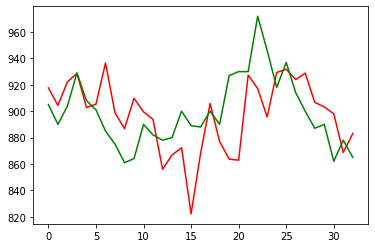

In [ ]:
predict_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

predict_df_inverse['target_price']=np.array(model.predict(test_df_x))

actual_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

actual_df_inverse['target_price']=np.array(test_df_y)

predicted_value_lstm=scaler.inverse_transform(predict_df_inverse)[:,-1]
actual_value=scaler.inverse_transform(actual_df_inverse)[:,-1]
plt.plot(predicted_value_lstm , color="red")
plt.plot(actual_value, color="green")


In [ ]:
from tensorflow.keras.layers import GRU

EPOCHS = 500
BATCH_SIZE = 64
# NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}"

model = Sequential()
model.add(GRU(128,input_shape = (train_df_x.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Flatten()) 

# model.add(Dense(32, activation="swish"))
# model.add(Dropout(0.2))

model.add(Dense(1, activation="relu"))

opt=tf.keras.optimizers.Adam()
model.compile(loss='huber_loss',
              optimizer=opt,
              # metrics=[tf.keras.metrics.huber()]
              )

tensorboard = TensorBoard(log_dir=f'logs/{Company_symbol}')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True,monitor='val_loss', verbose=1,)

history = model.fit(
    train_df_x, train_df_y,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data= (test_df_x,test_df_y),
    callbacks = [tensorboard,checkpoint_cb]
)


Epoch 1/500
3/3 [==============================] - 6s 850ms/step - loss: 0.5622 - val_loss: 0.9229

Epoch 00001: val_loss improved from inf to 0.92287, saving model to my_keras_model.h5
Epoch 2/500
3/3 [==============================] - 0s 46ms/step - loss: 0.4877 - val_loss: 0.9216

Epoch 00002: val_loss improved from 0.92287 to 0.92162, saving model to my_keras_model.h5
Epoch 3/500
3/3 [==============================] - 0s 42ms/step - loss: 0.4728 - val_loss: 0.9229

Epoch 00003: val_loss did not improve from 0.92162
Epoch 4/500
3/3 [==============================] - 0s 41ms/step - loss: 0.5880 - val_loss: 0.9229

Epoch 00004: val_loss did not improve from 0.92162
Epoch 5/500
3/3 [==============================] - 0s 32ms/step - loss: 0.4930 - val_loss: 0.9229

Epoch 00005: val_loss did not improve from 0.92162
Epoch 6/500
3/3 [==============================] - 0s 34ms/step - loss: 0.4665 - val_loss: 0.9205

Epoch 00006: val_loss improved from 0.92162 to 0.92050, saving model to my_k

In [ ]:
model = tf.keras.models.load_model('/content/my_keras_model.h5')


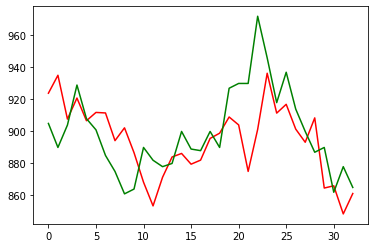

In [ ]:
predict_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

predict_df_inverse['target_price']=np.array(model.predict(test_df_x))

actual_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

actual_df_inverse['target_price']=np.array(test_df_y)

predicted_value_GRU=scaler.inverse_transform(predict_df_inverse)[:,-1]
actual_value=scaler.inverse_transform(actual_df_inverse)[:,-1]
plt.plot(predicted_value_GRU , color="red")
plt.plot(actual_value, color="green")


In [ ]:
from tensorflow.keras.layers import GRU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
EPOCHS = 500
BATCH_SIZE = 64
# NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}"

model = Sequential()
model.add(GRU(128,input_shape = (train_df_x.shape[1:]),return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(128,return_sequences=True,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Flatten()) 

# model.add(Dense(32, activation="swish"))
# model.add(Dropout(0.2))

model.add(Dense(1, activation="relu"))

opt=tf.keras.optimizers.Adam()
model.compile(loss='huber_loss',
              optimizer=opt,
              # metrics=[tf.keras.metrics.huber()]
              )

tensorboard = TensorBoard(log_dir=f'logs/{Company_symbol}')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True,monitor='val_loss', verbose=1,)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5,min_lr=0.0000001,verbose=1)

history = model.fit(
    train_df_x, train_df_y,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data= (test_df_x,test_df_y),
    callbacks = [tensorboard,checkpoint_cb,reduce_lr]
)


Epoch 1/500
3/3 [==============================] - 6s 860ms/step - loss: 0.9752 - val_loss: 1.0149

Epoch 00001: val_loss improved from inf to 1.01491, saving model to my_keras_model.h5
Epoch 2/500
3/3 [==============================] - 0s 46ms/step - loss: 0.6326 - val_loss: 1.0148

Epoch 00002: val_loss improved from 1.01491 to 1.01485, saving model to my_keras_model.h5
Epoch 3/500
3/3 [==============================] - 0s 44ms/step - loss: 0.5318 - val_loss: 1.0148

Epoch 00003: val_loss improved from 1.01485 to 1.01480, saving model to my_keras_model.h5
Epoch 4/500
3/3 [==============================] - 0s 46ms/step - loss: 0.4902 - val_loss: 1.0148

Epoch 00004: val_loss improved from 1.01480 to 1.01477, saving model to my_keras_model.h5
Epoch 5/500
3/3 [==============================] - 0s 40ms/step - loss: 0.5118 - val_loss: 1.0148

Epoch 00005: val_loss improved from 1.01477 to 1.01476, saving model to my_keras_model.h5
Epoch 6/500
3/3 [==============================] - 0s 40ms

In [ ]:
model = tf.keras.models.load_model('/content/my_keras_model.h5')


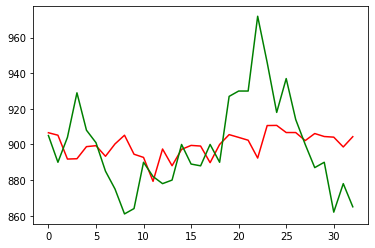

In [ ]:
predict_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

predict_df_inverse['target_price']=np.array(model.predict(test_df_x))

actual_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

actual_df_inverse['target_price']=np.array(test_df_y)

predicted_value_gru_with_regularization=scaler.inverse_transform(predict_df_inverse)[:,-1]
actual_value=scaler.inverse_transform(actual_df_inverse)[:,-1]
plt.plot(predicted_value_gru_with_regularization , color="red")
plt.plot(actual_value, color="green")


In [ ]:
final_df = pd.DataFrame(columns=['Date','Symbol','Open','Close','High','Low','High_quantity_transaction'])

In [ ]:
final_df

,Date,Symbol,Open,Close,High,Low,High_quantity_transaction


In [ ]:
Company_symbol = 'NICA'
company_df=df[df['Symbol']==Company_symbol]
for index,date in enumerate(company_df['Date'].unique()):
  Open=company_df[company_df['Date']==date].iloc[0,4]
  Close=company_df[company_df['Date']==date].iloc[-1,4]
  High=max(company_df[company_df['Date']==date].iloc[:,4])
  Low=min(company_df[company_df['Date']==date].iloc[:,4])
  High_quantity_value=company_df['ShareQty'].describe()['75%']*4
  High_quantity_transaction=np.sum(company_df[company_df['Date']==date]['ShareQty']>High_quantity_value)
  final_df.loc[index,['Date','Symbol','Open','Close','High','Low','High_quantity_transaction']]=[date,Company_symbol,Open,Close,High,Low,High_quantity_transaction]

In [ ]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.set_index('Date' , inplace=True)
final_df.sort_index(inplace=True)

In [ ]:
final_df.describe()

,Symbol,Open,Close,High,Low,High_quantity_transaction
count,180,180,180,180,180,180
unique,1,116,120,122,120,46
top,NICA,580,580,582,570,2
freq,180,5,7,8,6,12


In [ ]:
final_df.isna().sum()

Symbol                       0
Open                         0
Close                        0
High                         0
Low                          0
High_quantity_transaction    0
dtype: int64

In [ ]:
final_df.fillna(0 ,inplace=True)

In [ ]:
# RSI 14 DAYS
n = 14
def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

final_df['change'] = final_df['Close'].diff()
final_df['gain'] = final_df.change.mask(final_df.change < 0, 0.0)
final_df['loss'] = -final_df.change.mask(final_df.change > 0, -0.0)
final_df['avg_gain'] = rma(final_df.gain[n+1:].to_numpy(), n, np.nansum(final_df.gain.to_numpy()[:n+1])/n)
final_df['avg_loss'] = rma(final_df.loss[n+1:].to_numpy(), n, np.nansum(final_df.loss.to_numpy()[:n+1])/n)
final_df['rs'] = final_df.avg_gain / final_df.avg_loss
final_df['rsi_14'] = 100 - (100 / (1 + final_df.rs))

In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
Date,,,,,,,,,,,,,
2020-03-05,NICA,575,572,589,560,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,NICA,526,549,564,526,19,-23.0,0.0,23.0,NaN,NaN,NaN,NaN
2020-03-11,NICA,567,549,569,520,29,0.0,0.0,-0.0,NaN,NaN,NaN,NaN
2020-03-12,NICA,545,564,569,545,18,15.0,15.0,0.0,NaN,NaN,NaN,NaN
2020-03-15,NICA,521,545,547,518,16,-19.0,0.0,19.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,NICA,892,887,927,861,14,-13.0,0.0,13.0,7.956010,9.032390,0.880831,46.832016
2021-03-02,NICA,880,890,909,862,14,3.0,3.0,0.0,7.602009,8.387219,0.906380,47.544567
2021-03-03,NICA,855,862,876,853,25,-28.0,0.0,28.0,7.059009,9.788132,0.721180,41.900337


In [ ]:
# Calculating _moving_average
final_df['MA_7'] = final_df['Close'].rolling(window=7).mean()
final_df['MA_14'] = final_df['Close'].rolling(window=14).mean()


In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,MA_7,MA_14
Date,,,,,,,,,,,,,,,
2020-03-05,NICA,575,572,589,560,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,NICA,526,549,564,526,19,-23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,NICA,567,549,569,520,29,0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,NICA,545,564,569,545,18,15.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,NICA,521,545,547,518,16,-19.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,NICA,892,887,927,861,14,-13.0,0.0,13.0,7.956010,9.032390,0.880831,46.832016,924.857143,916.285714
2021-03-02,NICA,880,890,909,862,14,3.0,3.0,0.0,7.602009,8.387219,0.906380,47.544567,913.142857,916.357143
2021-03-03,NICA,855,862,876,853,25,-28.0,0.0,28.0,7.059009,9.788132,0.721180,41.900337,901.142857,914.500000


In [ ]:
look_back_period=3
for i in range(look_back_period):
  final_df[f'previous_day_price_{i+1}']=final_df["Close"].shift(i)
final_df['target_price']=final_df["Close"].shift(-look_back_period)


In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,MA_7,MA_14,previous_day_price_1,previous_day_price_2,previous_day_price_3,target_price
Date,,,,,,,,,,,,,,,,,,,
2020-03-05,NICA,575,572,589,560,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572,NaN,NaN,564.0
2020-03-10,NICA,526,549,564,526,19,-23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,549,572.0,NaN,545.0
2020-03-11,NICA,567,549,569,520,29,0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,549,549.0,572.0,517.0
2020-03-12,NICA,545,564,569,545,18,15.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,564,549.0,549.0,515.0
2020-03-15,NICA,521,545,547,518,16,-19.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,545,564.0,549.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,NICA,892,887,927,861,14,-13.0,0.0,13.0,7.956010,9.032390,0.880831,46.832016,924.857143,916.285714,887,900.0,914.0,878.0
2021-03-02,NICA,880,890,909,862,14,3.0,3.0,0.0,7.602009,8.387219,0.906380,47.544567,913.142857,916.357143,890,887.0,900.0,865.0
2021-03-03,NICA,855,862,876,853,25,-28.0,0.0,28.0,7.059009,9.788132,0.721180,41.900337,901.142857,914.500000,862,890.0,887.0,NaN


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_df.iloc[:,1:])
final_df.iloc[:,1:] =scaler.transform(final_df.iloc[:,1:])

In [ ]:
final_df

,Symbol,Open,Close,High,Low,High_quantity_transaction,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,MA_7,MA_14,previous_day_price_1,previous_day_price_2,previous_day_price_3,target_price
Date,,,,,,,,,,,,,,,,,,,
2020-07-01,NICA,-1.052783,-1.085382,-1.108542,-1.140584,-1.107547,2.922840,3.615779,-0.543094,0.165952,2.128917,-1.022598,-1.560250,-1.393057,-1.167805,-1.085382,-1.527632,-1.750096,-1.392426
2020-07-02,NICA,-1.394220,-1.078486,-1.135386,-1.433049,-0.730972,-0.073816,-0.471062,-0.543094,0.040198,1.811555,-1.012681,-1.536300,-1.345201,-1.177574,-1.078486,-1.066067,-1.502946,-1.337257
2020-07-05,NICA,-1.380284,-1.423327,-1.323292,-1.440182,-0.806287,-2.389414,-0.532984,3.996616,-0.092016,2.816005,-1.313694,-2.349172,-1.357165,-1.213049,-1.423327,-1.059178,-1.042973,-1.309672
2020-07-06,NICA,-1.289698,-1.347462,-1.336714,-1.383116,-1.107547,0.380223,0.148157,-0.543094,-0.044909,2.449565,-1.219214,-2.073424,-1.353177,-1.250581,-1.347462,-1.403630,-1.036108,-1.316568
2020-07-07,NICA,-1.226985,-1.292287,-1.222628,-1.247583,-1.107547,0.244011,-0.037609,-0.543094,-0.047497,2.109300,-1.145215,-1.871284,-1.327255,-1.274231,-1.292287,-1.327850,-1.379371,-1.254503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,NICA,1.650843,1.728522,1.716768,1.719869,0.700014,0.743454,0.643531,-0.543094,0.337622,0.302184,-0.025752,0.213581,1.806310,1.756056,1.728522,1.613766,1.819843,1.338441
2021-02-25,NICA,1.546321,1.569895,1.790589,1.541536,0.022179,-1.163509,-0.532984,1.545173,0.184163,0.712909,-0.455260,-0.420132,1.793349,1.774565,1.569895,1.744658,1.627616,1.359130
2021-02-28,NICA,1.379087,1.473339,1.347666,1.455937,0.549384,-0.754874,-0.532984,0.728025,0.041666,0.860450,-0.655335,-0.774883,1.763439,1.784848,1.473339,1.586210,1.758056,1.166038


In [ ]:
total_entry= len(final_df)
train_df_x=final_df.iloc[:int(.8*total_entry),1:-1]
train_df_y=final_df.iloc[:int(.8*total_entry),-1]
test_df_x=final_df.iloc[int(.8*total_entry):,1:-1]
test_df_y=final_df.iloc[int(.8*total_entry):,-1]


In [ ]:
train_df_x=np.array(train_df_x)
test_df_x=np.array(test_df_x)
train_df_y=np.array(train_df_y)
test_df_y=np.array(test_df_y)
train_df_x =train_df_x.reshape(train_df_x.shape[0],train_df_x.shape[1] , 1)
test_df_x = test_df_x.reshape(test_df_x.shape[0],test_df_x.shape[1] , 1)

In [ ]:
from tensorflow.keras.layers import GRU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
EPOCHS = 500
BATCH_SIZE = 64
# NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}"

model = Sequential()
model.add(GRU(128,input_shape = (train_df_x.shape[1:]),return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(128,return_sequences=True,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Flatten()) 

# model.add(Dense(32, activation="swish"))
# model.add(Dropout(0.2))

model.add(Dense(1, activation="relu"))

opt=tf.keras.optimizers.Adam()
model.compile(loss='huber_loss',
              optimizer=opt,
              # metrics=[tf.keras.metrics.huber()]
              )

tensorboard = TensorBoard(log_dir=f'logs/{Company_symbol}')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True,monitor='val_loss', verbose=1,)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5,min_lr=0.0000001,verbose=1)

history = model.fit(
    train_df_x, train_df_y,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data= (test_df_x,test_df_y),
    callbacks = [tensorboard,checkpoint_cb,reduce_lr]
)


Epoch 1/500
3/3 [==============================] - 6s 1s/step - loss: 0.6721 - val_loss: 1.0140

Epoch 00001: val_loss improved from inf to 1.01395, saving model to my_keras_model.h5
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5378 - val_loss: 1.0005

Epoch 00002: val_loss improved from 1.01395 to 1.00049, saving model to my_keras_model.h5
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5419 - val_loss: 1.0144

Epoch 00003: val_loss did not improve from 1.00049
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.4919 - val_loss: 1.0120

Epoch 00004: val_loss did not improve from 1.00049
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5092 - val_loss: 1.0100

Epoch 00005: val_loss did not improve from 1.00049
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5697 - val_loss: 1.0077

Epoch 00006: val_loss did not improve from 1.00049
Epoch 7/500
3/3 [===========

In [ ]:
model = tf.keras.models.load_model('/content/my_keras_model.h5')


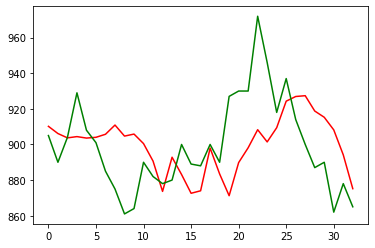

In [ ]:
predict_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

predict_df_inverse['target_price']=np.array(model.predict(test_df_x))

actual_df_inverse=final_df.iloc[int(.8*total_entry):,1:-1]

actual_df_inverse['target_price']=np.array(test_df_y)

predicted_value_gru_with_regularization_without_broker=scaler.inverse_transform(predict_df_inverse)[:,-1]
actual_value=scaler.inverse_transform(actual_df_inverse)[:,-1]
plt.plot(predicted_value_gru_with_regularization_without_broker , color="red")
plt.plot(actual_value, color="green")

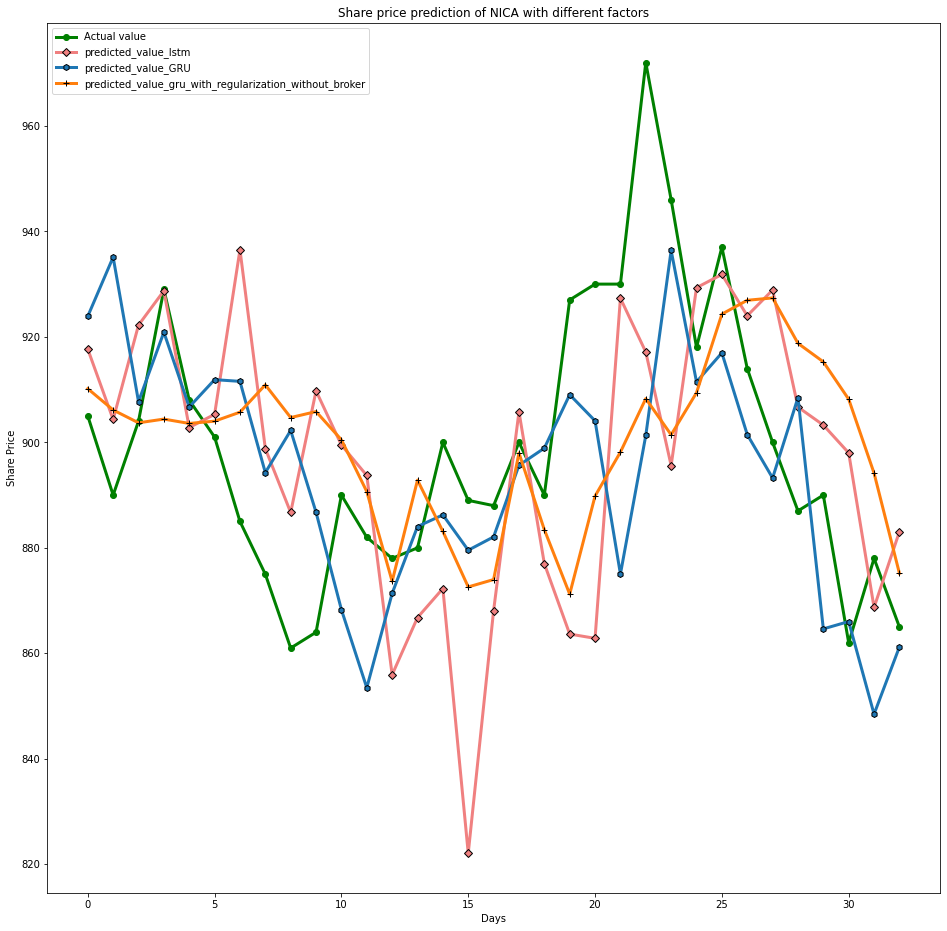

In [ ]:
plt.figure(figsize=(16,16))
plt.xlabel('Days')
plt.ylabel('Share Price')
plt.title('Share price prediction of NICA with different factors')
plt.plot(actual_value,'g-o',color='green',linewidth=3)
plt.plot(predicted_value_lstm,color='lightcoral', marker='D', markeredgecolor='black',linewidth=3)
plt.plot(predicted_value_GRU,marker='h', markeredgecolor='black',linewidth=3)
plt.plot(predicted_value_gru_with_regularization_without_broker,marker='+', markeredgecolor='black',linewidth=3)
plt.legend(["Actual value", "predicted_value_lstm","predicted_value_GRU","predicted_value_gru_with_regularization_without_broker"])
plt.savefig("nica.jpg")

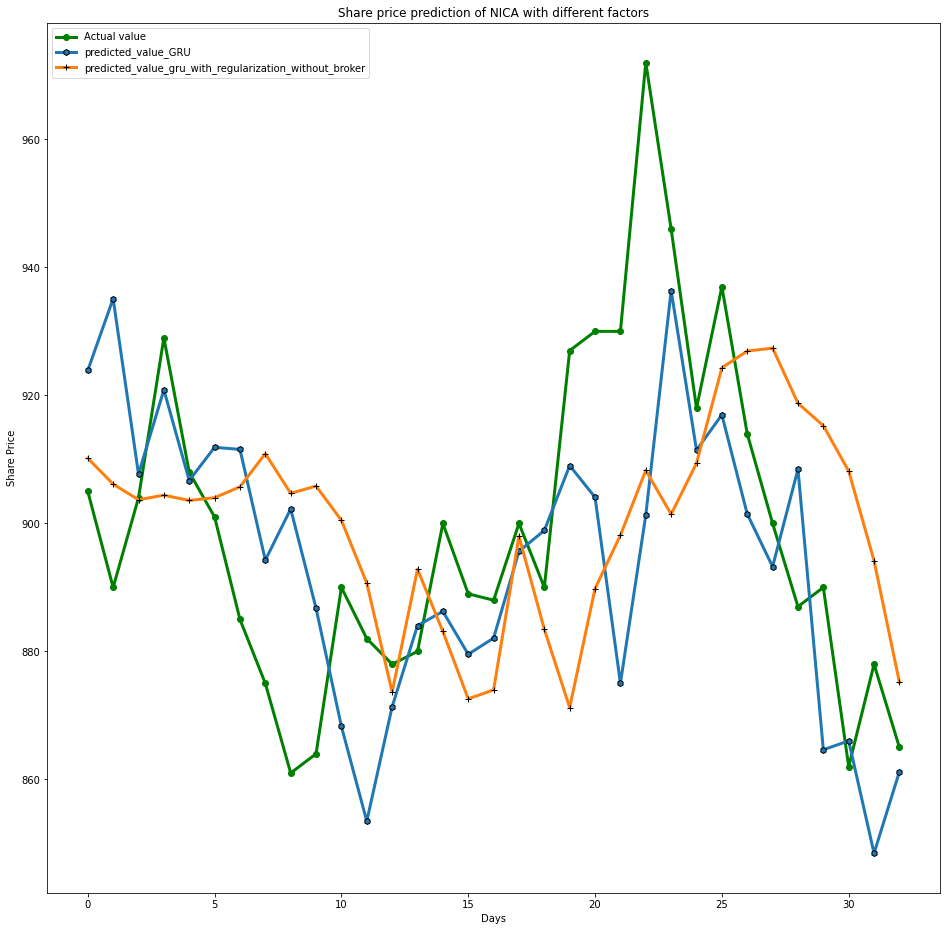

In [ ]:
plt.figure(figsize=(16,16))
plt.xlabel('Days')
plt.ylabel('Share Price')
plt.title('Share price prediction of NICA with different factors')
plt.plot(actual_value,'g-o',color='green',linewidth=3)
plt.plot(predicted_value_GRU,marker='h', markeredgecolor='black',linewidth=3)
plt.plot(predicted_value_gru_with_regularization_without_broker,marker='+', markeredgecolor='black',linewidth=3)
plt.legend(["Actual value","predicted_value_GRU","predicted_value_gru_with_regularization_without_broker"])
plt.savefig("nica.jpg")